In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [47]:
def plot_confusion_matrix(y, y_predicted):
    ax = plt.subplot()
    cm = confusion_matrix(y, y_predicted)
    sns.heatmap(cm, annot=True, ax=ax)
    ax.set_xlabel("Predicted Result")
    ax.set_ylabel("True Result")
    ax.set_title("Confusion Matrix")
    ax.xaxis.set_ticklabels(["did not land", "land"])
    ax.yaxis.set_ticklabels(["did not land", "landed"])

1. Prepare features and target variable

In [70]:
x = pd.read_csv("../EDA/features.csv")
x.head()

,flight no,payload mass,flights,gridfins,reused,legs,block,reused count,orbit_ES-L1,orbit_GEO,...,serial_B1060,serial_B1061,serial_B1062,serial_B1063,serial_B1067,serial_B1069,serial_B1071,serial_B1072,serial_B1073,serial_B1077
0,6.0,8117.574038,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.0,8117.574038,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9.0,400.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
df = pd.read_csv("../cleaning-data/api-cleaned-data.csv")
y = df['outcome']
y.replace(False, 0, inplace=True)
y.replace(True, 1, inplace=True)
y = y.to_numpy()
y

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

2. Standardize the features

In [39]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

3. Split the data into training and test data

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(143, 95) (36, 95) (143,) (36,)


4. Logistic regrssion

In [44]:
parameters = {
    'C': [0.01, 0.1, 1],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}
LR = LogisticRegression()
LR_model = GridSearchCV(LR, parameters, cv=10)
LR_model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [46]:
print(LR_model.best_params_, LR_model.best_score_)
print(LR_model.score(x_test, y_test))

{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'} 0.8947619047619048
0.8611111111111112


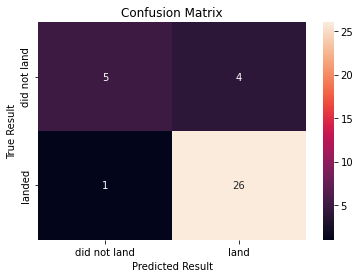

In [48]:
y_predicted = LR_model.predict(x_test)
plot_confusion_matrix(y_test, y_predicted)

5. Support vector machine

In [49]:
parameters = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}
SVM = SVC()
SVM_model = GridSearchCV(SVM, parameters, cv=10)
SVM_model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [50]:
print(SVM_model.best_params_, SVM_model.best_score_)
print(SVM_model.score(x_test, y_test))

{'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'} 0.9157142857142857
0.9166666666666666


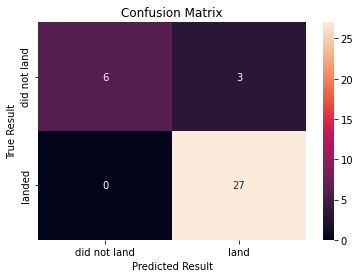

In [51]:
y_predicted = SVM_model.predict(x_test)
plot_confusion_matrix(y_test, y_predicted)

6. Decision tree

In [52]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1,10)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2,5,10]
}
tree = DecisionTreeClassifier()
tree_model = GridSearchCV(tree, parameters, cv=10)
tree_model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [54]:
print(tree_model.best_params_, tree_model.best_score_)
print(tree_model.score(x_test, y_test))

{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'} 0.9366666666666668
0.6944444444444444


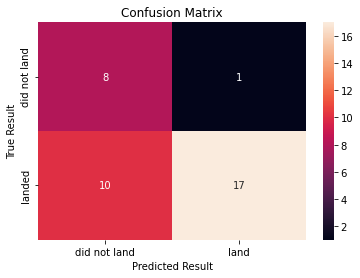

In [55]:
y_predicted = tree_model.predict(x_test)
plot_confusion_matrix(y_test, y_predicted)

7. K nearest neighbors

In [56]:
parameters = {
    "n_neighbors": [1,2,3,4,5,6,7,8,9,10],
    "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
    "p": [1,2]
}
KNN = KNeighborsClassifier()
KNN_model = GridSearchCV(KNN, parameters, cv=10)
KNN_model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [57]:
print(KNN_model.best_params_, KNN_model.best_score_)
print(KNN_model.score(x_test, y_test))

{'algorithm': 'auto', 'n_neighbors': 3, 'p': 1} 0.8952380952380953
0.8611111111111112


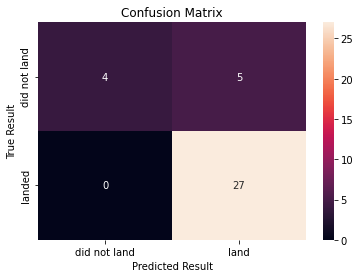

In [58]:
y_predicted = KNN_model.predict(x_test)
plot_confusion_matrix(y_test, y_predicted)

8. Compare the performance between model

We can see that decision tree has the best score model but lowest point on test score, this can be caused by overfitting, instead using support vector machine returns the high score for its own model and also the test data

In [69]:
performance = pd.DataFrame(columns=["model", "best_params", "best_score", "test_score"])
models = {
    "Logistic Regression": LR_model, 
    "Support Vector Machine": SVM_model, 
    "Decision Tree": tree_model, 
    "K-nearest Neighbors": KNN_model
}
for name in models:
    row = pd.Series({
        "model": name,
        "best_params": models[name].best_params_,
        "best_score": models[name].best_score_,
        "test_score": models[name].score(x_test, y_test)
    })
    performance = pd.concat([performance, row.to_frame().T], ignore_index=True)
performance

,model,best_params,best_score,test_score
0,Logistic Regression,"{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.894762,0.861111
1,Support Vector Machine,"{'C': 1.0, 'gamma': 0.03162277660168379, 'kern...",0.915714,0.916667
2,Decision Tree,"{'criterion': 'entropy', 'max_depth': 6, 'max_...",0.936667,0.694444
3,K-nearest Neighbors,"{'algorithm': 'auto', 'n_neighbors': 3, 'p': 1}",0.895238,0.861111
